In [857]:
%load_ext tikzmagic
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import HTML
def css_styling():
    styles = """
<style>
.output_png { text-align:  center; }
</style>
    """
    return HTML(styles)
css_styling()


The tikzmagic extension is already loaded. To reload it, use:
  %reload_ext tikzmagic


# Sieci neuronowe
##Metody uczenia

## Trochę historii: Perceptron liniowy

**Mark 1 perceptron** (Frank Rosenblatt, 1957): 
* Aparat przeznaczony do rozpoznawania obrazu;
* 400 fotokomórek
* Wagi to potencjometry;
* Wagi aktualizowana za pomocą silniczków.

The New York Times, 1958:
> [...] the embryo of an electronic computer that the Navy expects will be able to walk, talk, see, write, reproduce itself and be conscious of its existence.

<img style="margin: auto" width="80%" src="http://m.natemat.pl/b94a41cd7322e1b8793e4644e5f82683,641,0,0,0.png" alt="Frank Rosenblatt"/>

<img style="margin: auto" src="http://m.natemat.pl/02943a7dc0f638d786b78cd5c9e75742,641,0,0,0.png" width="70%" alt="Frank Rosenblatt"/>


<img style="margin:auto" src="http://www.newyorker.com/wp-content/uploads/2012/11/frank-rosenblatt-perception.jpg" width="60%"/>

In [858]:
from IPython.display import YouTubeVideo
YouTubeVideo('cNxadbrN_aI', width=800, height=600)

## Uczenie (bez ingerencji człowieka)

Cykl uczenia perceptronu (w sumie 2000 "epok"):
* pokazanie (do kamery cyfrowej) planszy z kolejnym obiektem (np. trójkat, koło, kwadrat,...);
* zaobserwowanie, jaka lampka się zapaliła na wyjściu;
* sprawdzenie, czy jest to właściwa lampka (arbitralnie ustalona);
* wysłanie sygnału "nagrody" lub "kary".
* Człowiek tylko "podaje" informacje.

## Perceptron: formalizacja

Nieliniowa funkcja aktywacji (Rosenblatt: funkcja schodkowa):

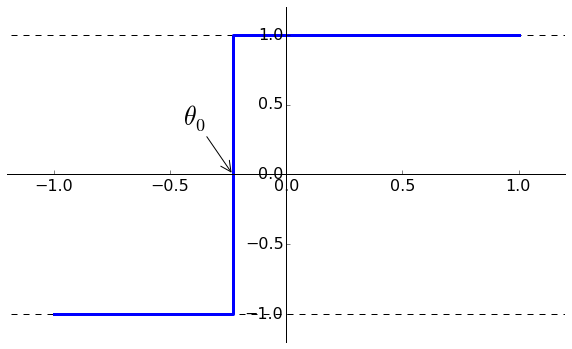

In [859]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 16})


plt.figure(figsize=(10,6))
x = [-1,-.23,1] 
y = [-1, -1, 1]
plt.ylim(-1.2,1.2)
plt.xlim(-1.2,1.2)
plt.plot([-2,2],[1,1], color='black', ls="dashed")
plt.plot([-2,2],[-1,-1], color='black', ls="dashed")
plt.step(x, y, lw=3)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.annotate(r'$\theta_0$',
             xy=(-.23,0), xycoords='data',
             xytext=(-50, +50), textcoords='offset points', fontsize=26,
             arrowprops=dict(arrowstyle="->"))

plt.show()

$$ g(z) = \left\{ 
\begin{array}{rl}
1  & \textrm{gdy $z > \theta_0$} \\
-1 & \textrm{wpp.}
\end{array}
\right. $$

gdzie $z = \theta_0x_0 + \ldots + \theta_nx_n$. Niech $\theta_0$ to próg aktywacji, ustalamy $x_0 = 1$. 


## Składamy wszystko w całość

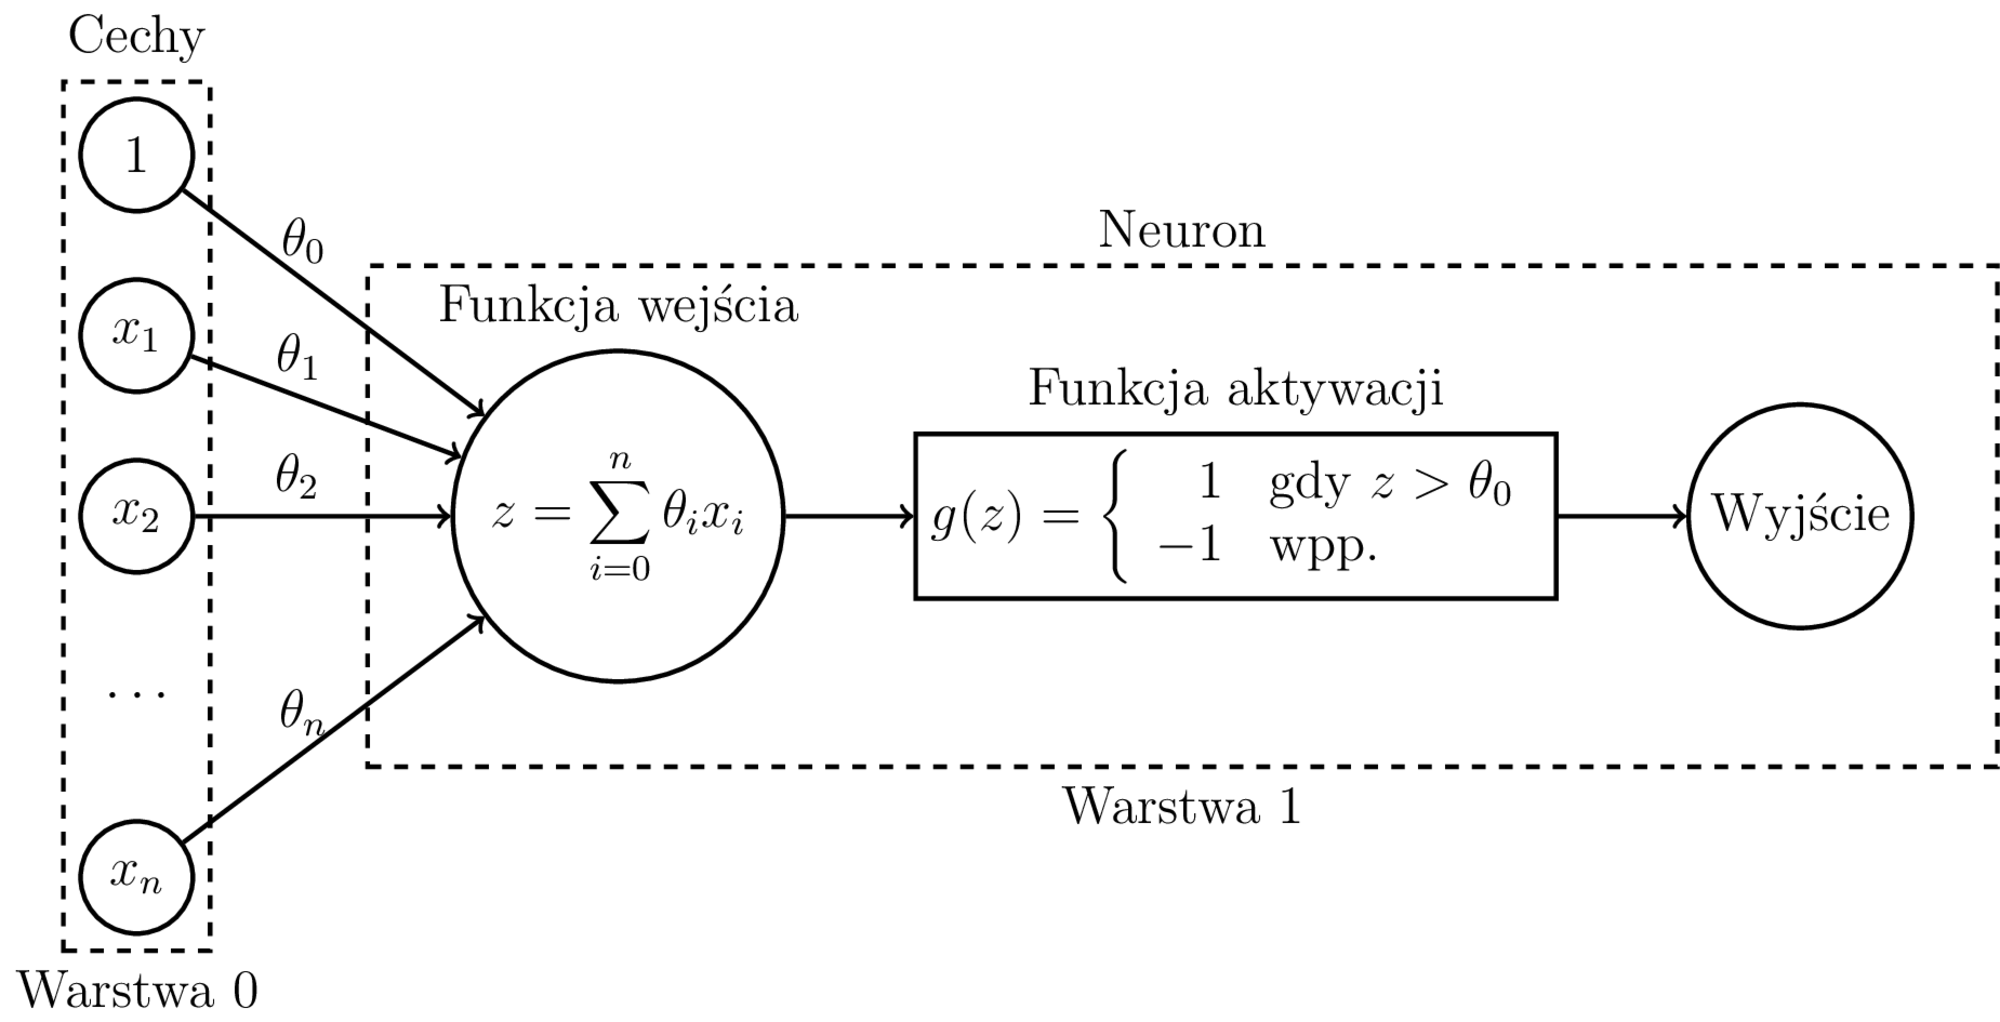

In [860]:
%%tikz -l arrows,automata,positioning,shapes,shapes.geometric,fit -f png -s 2000,1400
\tikzstyle{every node}=[font=\large]
\tikzstyle{every path}=[line width=1pt]

\node[state] (x0) {$1$};
\node[state] (x1) [below=0.5cm of x0] {$x_1$};
\node[state] (x2) [below=0.5cm of x1] {$x_2$};
\node[state, draw=none,fill=none] (dots) [below=0.5cm of x2] {$\cdots$};
\node[state] (xn) [below=0.5cm of dots] {$x_n$};

\node[state,circle,label=above:{Funkcja wej\'{s}cia}] (sum) [right=2cm of x2] {$z=\displaystyle\sum_{i=0}^{n}\theta_ix_i$};
\node[state,rectangle,label=above:{Funkcja aktywacji}] (g) [right=of sum] 
{$g(z) = \left\{\begin{array}{rl} 1 & \textrm{gdy } z > \theta_0 \\ -1 & \textrm{wpp.} \end{array}\right.$};
\node[state] (output) [right=of g]  {Wyj\'{s}cie};


\path[->] 
(x0) edge node [above, pos=0.4] {$\theta_0$} (sum)
(x1) edge node [above, pos=0.4] {$\theta_1$} (sum)
(x2) edge node [above, pos=0.4] {$\theta_2$} (sum)
(xn) edge node [above, pos=0.4] {$\theta_n$} (sum)
(sum) edge node {} (g)
(g) edge node {} (output);
 
\node [draw,dashed, fit= (x0) (x1) (x2) (dots) (xn),label=above:Cechy, label=below:{Warstwa 0}] {};
\node [draw,dashed, fit= (sum) (g) (output),label=above:Neuron, label=below:{Warstwa 1}, inner sep=0.65cm] {};

## Pseudokod

* Ustal wartości początkowe $\theta$ (wektor 0 lub liczby losowe blisko 0)
* Dla każdego przykładu $(x^{(i)}, y^{(i)})$, dla $i=1,\ldots,m$
    * Oblicz wartość wyjścia $o^{(i)}$:
    $$o^{(i)} = g(\theta^{T}x^{(i)}) = g(\sum_{j=0}^{n} \theta_jx_j^{(i)})$$
    * Wykonaj aktualizację wag (tzw. ***perceptron rule***):
    $$ \theta := \theta + \Delta \theta $$
    $$ \Delta \theta = \alpha(y^{(i)}-o^{(i)})x^{(i)} $$

**Pytania:**
* Co nam to przypomina?
* Jakie wartości może przyjąć wyrażenie $\Delta \theta_j$?

** Reguła perceptronowa: **

$$\theta_j := \theta_j + \Delta \theta_j $$

**Poprawnie zaklasyfikowane**:

* $y^{(i)}=1$ oraz $o^{(i)}=1$ : $$\Delta\theta_j = \alpha(1 - 1)x_j^{(i)} = 0$$
* $y^{(i)}=-1$ oraz $o^{(i)}=-1$ : $$\Delta\theta_j = \alpha(-1 - -1)x_j^{(i)} = 0$$

Skoro trafiłeś, to nic nie zmieniaj!

** Reguła perceptronowa: **

$$\theta_j := \theta_j + \Delta \theta_j $$

**Niepoprawnie zaklasyfikowane**:

* $y^{(i)}=1$ oraz $o^{(i)}=-1$ : $$\Delta\theta_j = \alpha(1 - -1)x_j^{(i)} = 2 \alpha x_j^{(i)}$$
* $y^{(i)}=-1$ oraz $o^{(i)}=1$ : $$\Delta\theta_j = \alpha(-1 - 1)x_j^{(i)} = -2 \alpha x_j^{(i)}$$

Przesuń w wagi w odpowiednią stronę:
* Czyli zmniejsz jeśli, niepoprawnie przekroczono próg; 
* Zwiększ, jeśli nie przekroczono.

## Zalety:
* Dosyć intuicyjny i prosty
* Łatwa implementacja
* Wykazano, że konwerguje w skończonym czasie, gdy dane można linowo oddzielić.

## Wady:
* Może "skakać" w nieskończoność dla danych, których nie da się oddzielić liniowo.

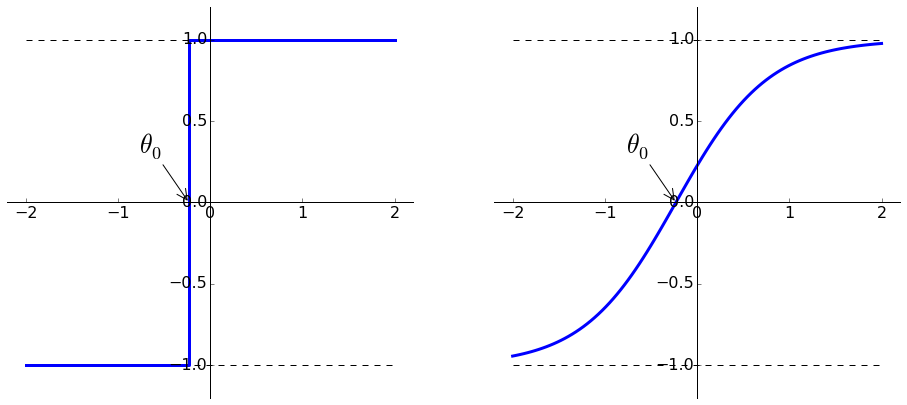

In [861]:


plt.figure(figsize=(16,7))
plt.subplot(121)
x = [-2,-.23,2] 
y = [-1, -1, 1]
plt.ylim(-1.2,1.2)
plt.xlim(-2.2,2.2)
plt.plot([-2,2],[1,1], color='black', ls="dashed")
plt.plot([-2,2],[-1,-1], color='black', ls="dashed")
plt.step(x, y, lw=3)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.annotate(r'$\theta_0$',
             xy=(-.23,0), xycoords='data',
             xytext=(-50, +50), textcoords='offset points', fontsize=26,
             arrowprops=dict(arrowstyle="->"))

import numpy as np

plt.subplot(122)
x2 = np.linspace(-2,2,100)
y2 = np.tanh(x2+ 0.23)
plt.ylim(-1.2,1.2)
plt.xlim(-2.2,2.2)
plt.plot([-2,2],[1,1], color='black', ls="dashed")
plt.plot([-2,2],[-1,-1], color='black', ls="dashed")
plt.plot(x2, y2, lw=3)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.annotate(r'$\theta_0$',
             xy=(-.23,0), xycoords='data',
             xytext=(-50, +50), textcoords='offset points', fontsize=26,
             arrowprops=dict(arrowstyle="->"))

plt.show()

## Rozwiązanie: SGD!

## Perceptron a regresja liniowa

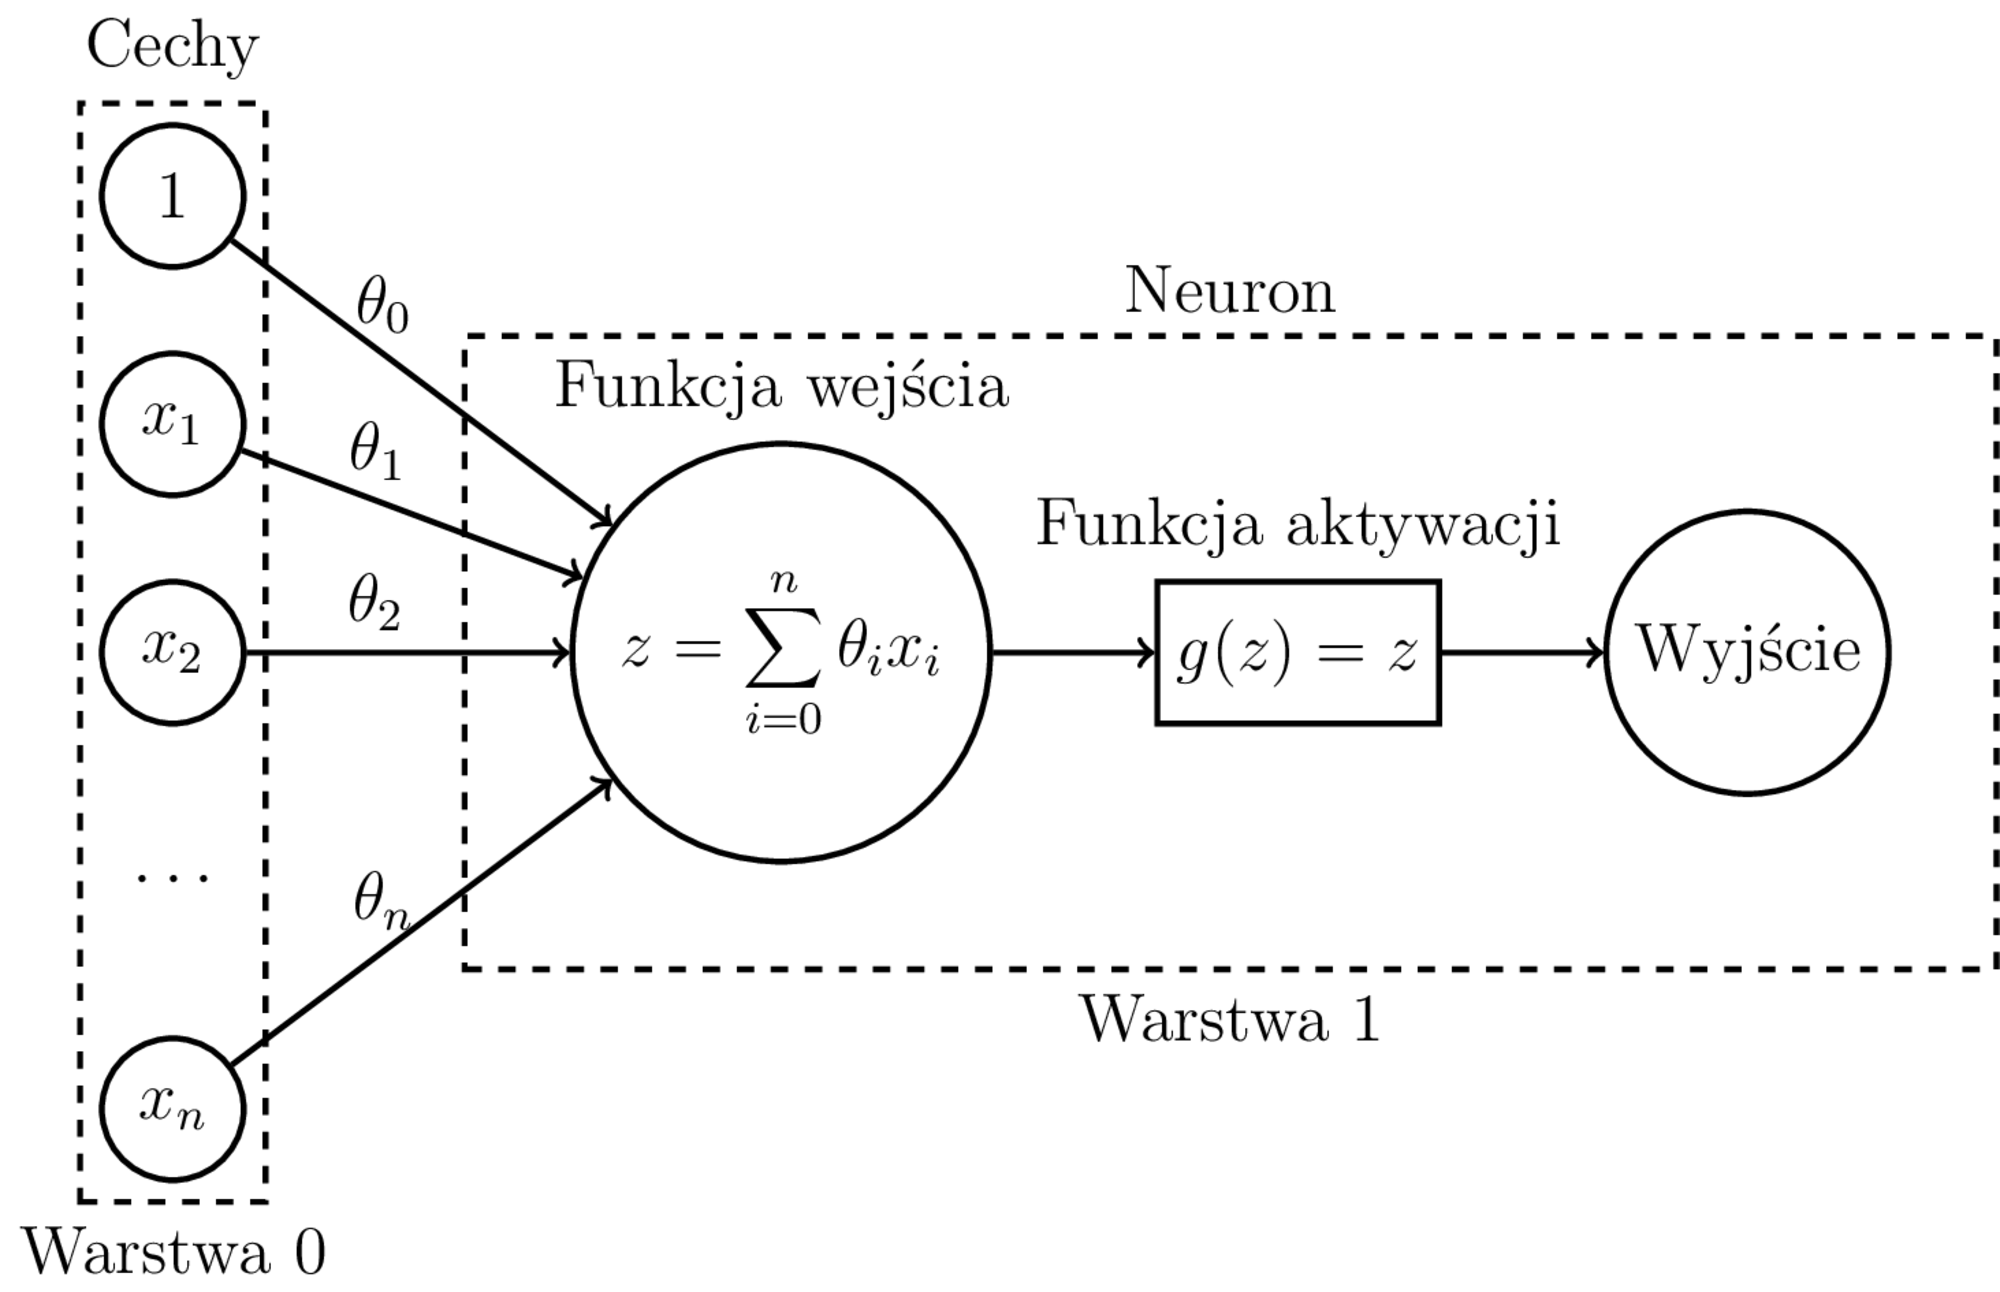

In [862]:
%%tikz -l arrows,automata,positioning,shapes,shapes.geometric,fit -f png -s 2000,1400
\tikzstyle{every node}=[font=\large]
\tikzstyle{every path}=[line width=1pt]

\node[state] (x0) {$1$};
\node[state] (x1) [below=0.5cm of x0] {$x_1$};
\node[state] (x2) [below=0.5cm of x1] {$x_2$};
\node[state, draw=none,fill=none] (dots) [below=0.5cm of x2] {$\cdots$};
\node[state] (xn) [below=0.5cm of dots] {$x_n$};

\node[state,circle,label=above:{Funkcja wej\'{s}cia}] (sum) [right=2cm of x2] {$z=\displaystyle\sum_{i=0}^{n}\theta_ix_i$};
\node[state,rectangle,label=above:{Funkcja aktywacji}] (g) [right=of sum] 
{$g(z) = z$};
\node[state] (output) [right=of g]  {Wyj\'{s}cie};


\path[->] 
(x0) edge node [above, pos=0.4] {$\theta_0$} (sum)
(x1) edge node [above, pos=0.4] {$\theta_1$} (sum)
(x2) edge node [above, pos=0.4] {$\theta_2$} (sum)
(xn) edge node [above, pos=0.4] {$\theta_n$} (sum)
(sum) edge node {} (g)
(g) edge node {} (output);
 
\node [draw,dashed, fit= (x0) (x1) (x2) (dots) (xn),label=above:Cechy, label=below:{Warstwa 0}] {};
\node [draw,dashed, fit= (sum) (g) (output),label=above:Neuron, label=below:{Warstwa 1}, inner sep=0.65cm] {};

## Uczenie regresji liniowej:
* Model: $$h_{\theta}(x) = \sum_{i=0}^n \theta_ix_i$$
* Funkcja kosztu (błąd średniokwadratowy): $$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2$$

* Po obliczeniu $\nabla J(\theta)$, zwykły SGD

## Perceptron a 
## binarna regresja logistyczna

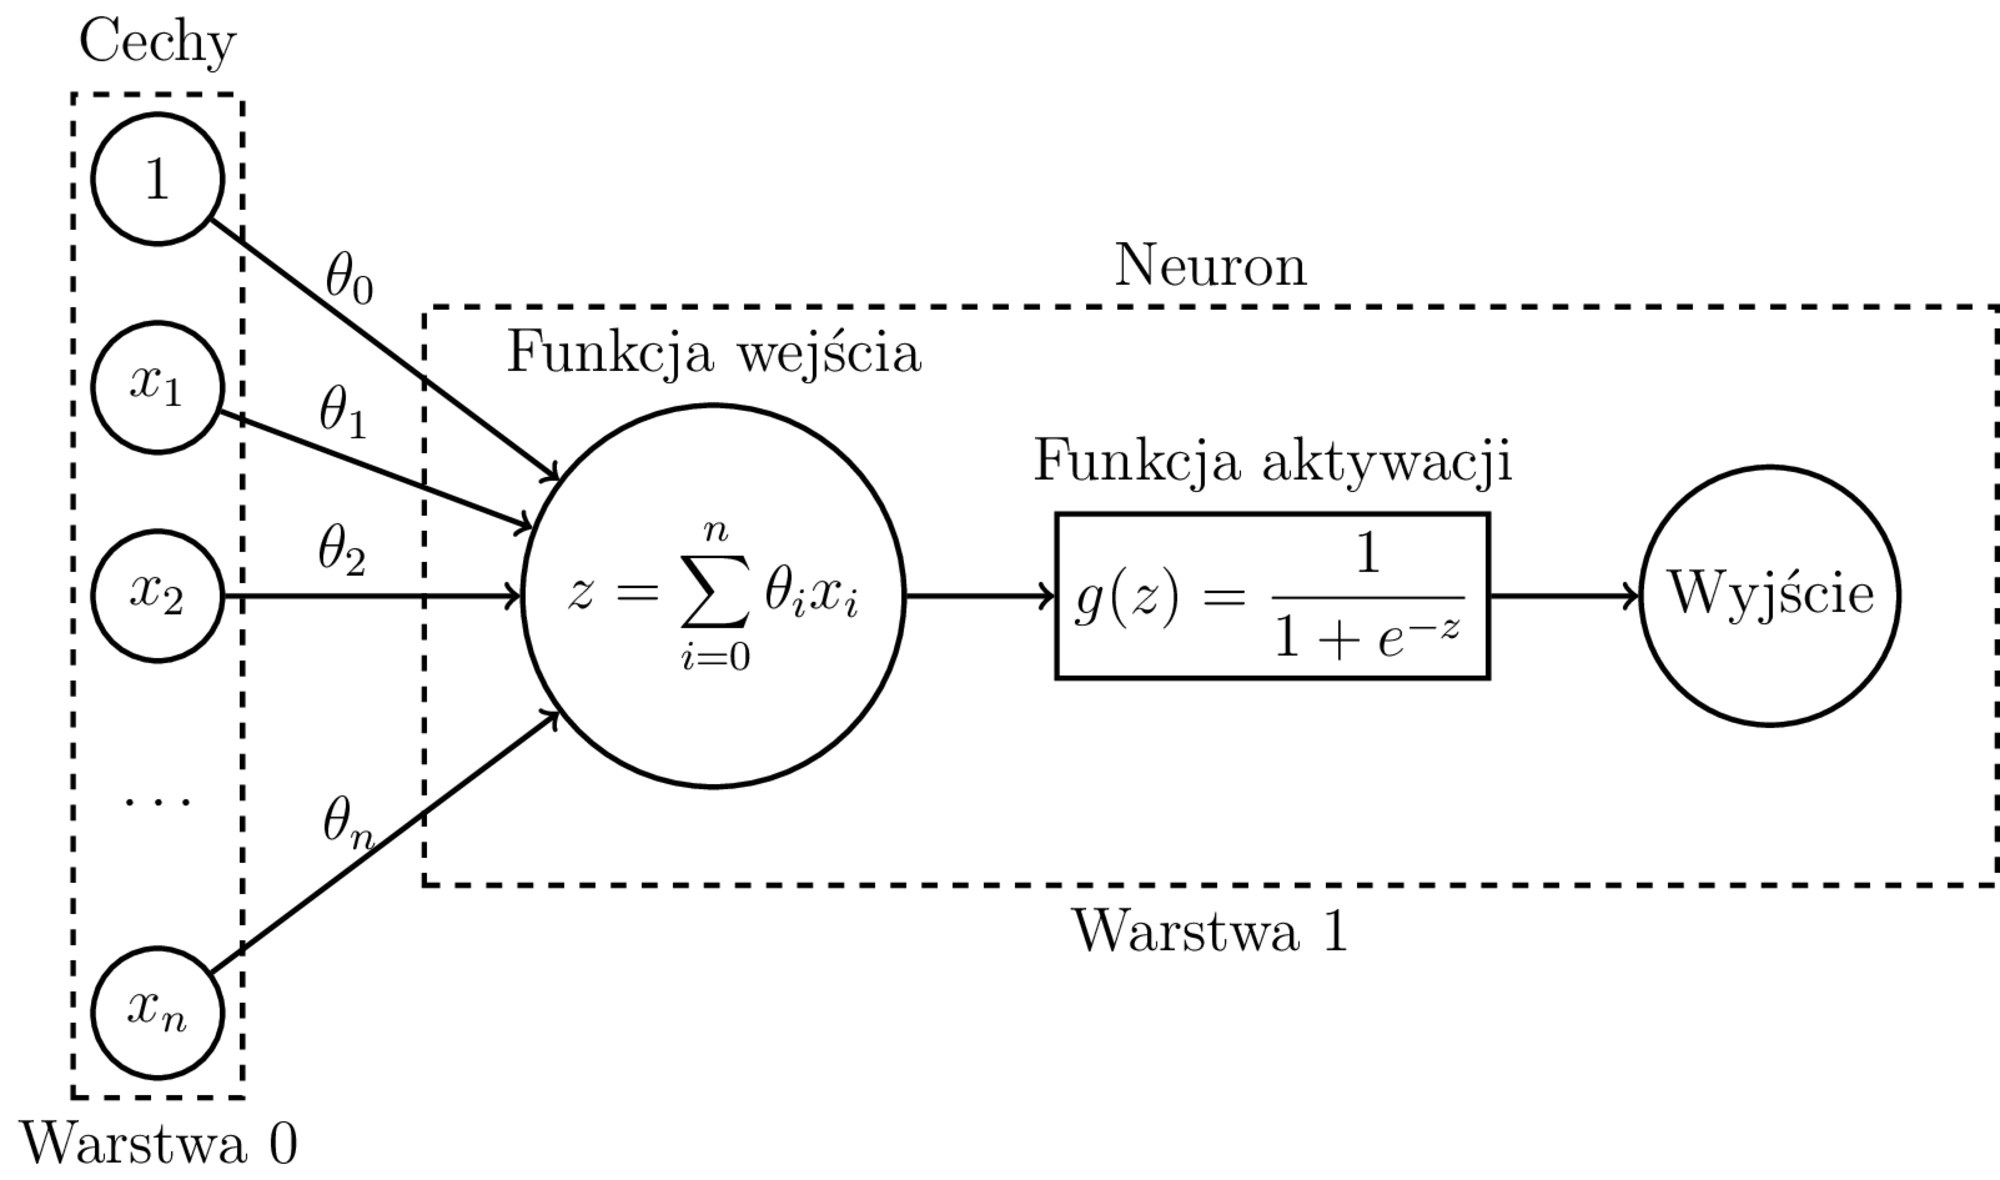

In [863]:
%%tikz -l arrows,automata,positioning,shapes,shapes.geometric,fit -f png -s 2000,1400
\tikzstyle{every node}=[font=\large]
\tikzstyle{every path}=[line width=1pt]

\node[state] (x0) {$1$};
\node[state] (x1) [below=0.5cm of x0] {$x_1$};
\node[state] (x2) [below=0.5cm of x1] {$x_2$};
\node[state, draw=none,fill=none] (dots) [below=0.5cm of x2] {$\cdots$};
\node[state] (xn) [below=0.5cm of dots] {$x_n$};

\node[state,circle,label=above:{Funkcja wej\'{s}cia}] (sum) [right=2cm of x2] {$z=\displaystyle\sum_{i=0}^{n}\theta_ix_i$};
\node[state,rectangle,label=above:{Funkcja aktywacji}] (g) [right=of sum] 
{$g(z) = \displaystyle\frac{1}{1+e^{-z}}$};
\node[state] (output) [right=of g]  {Wyj\'{s}cie};


\path[->] 
(x0) edge node [above, pos=0.4] {$\theta_0$} (sum)
(x1) edge node [above, pos=0.4] {$\theta_1$} (sum)
(x2) edge node [above, pos=0.4] {$\theta_2$} (sum)
(xn) edge node [above, pos=0.4] {$\theta_n$} (sum)
(sum) edge node {} (g)
(g) edge node {} (output);
 
\node [draw,dashed, fit= (x0) (x1) (x2) (dots) (xn),label=above:Cechy, label=below:{Warstwa 0}] {};
\node [draw,dashed, fit= (sum) (g) (output),label=above:Neuron, label=below:{Warstwa 1}, inner sep=0.65cm] {};


## Uczenie regresji logistycznej binarnej:
* Model: $$h_{\theta}(x) = \sigma(\sum_{i=0}^n \theta_ix_i) = P(1|x,\theta)$$
* Funkcja kosztu (entropia krzyżowa): $$\begin{eqnarray} J(\theta) &=& -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)}\log P(1|x^{(i)},\theta) \\ && + (1-y^{(i)})\log(1-P(1|x^{(i)},\theta))]\end{eqnarray}$$

* Po obliczeniu $\nabla J(\theta)$, zwykły SGD

## Perceptron a 
## wieloklasowa regresja logistyczna

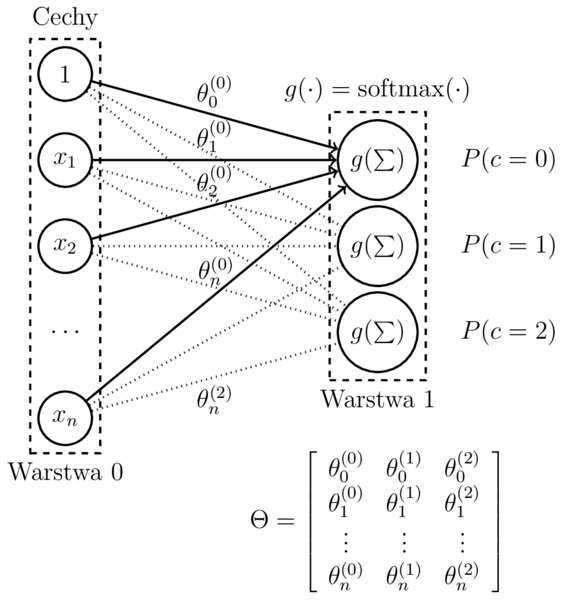

In [864]:
%%tikz -l arrows,automata,positioning,shapes,shapes.geometric,fit -f png -s 1000,600
\tikzstyle{every node}=[font=\large]
\tikzstyle{every path}=[line width=1pt]

\node[state] (x0) {$1$};
\node[state] (x1) [below=0.5cm of x0] {$x_1$};
\node[state] (x2) [below=0.5cm of x1] {$x_2$};
\node[state, draw=none,fill=none] (dots) [below=0.5cm of x2] {$\cdots$};
\node[state] (xn) [below=0.5cm of dots] {$x_n$};

\node[state,circle] (sum1) [right=4cm of x1] {$g(\sum)$};
\node[state,circle] (sum2) [right=4cm of x2] {$g(\sum)$};
\node[state,circle] (sum3) [right=4cm of dots] {$g(\sum)$};

\node[state, draw=none,fill=none] (p1) [right=0.5cm of sum1] {$P(c=0)$};
\node[state, draw=none,fill=none] (p2) [right=0.5cm of sum2] {$P(c=1)$};
\node[state, draw=none,fill=none] (p3) [right=0.5cm of sum3] {$P(c=2)$};

\path[->] 
(x0) edge node [above, pos=0.5] {$\theta^{(0)}_{0}$} (sum1)
(x1) edge node [above, pos=0.5] {$\theta^{(0)}_{1}$} (sum1)
(x2) edge node [above, pos=0.5] {$\theta^{(0)}_{2}$} (sum1)
(xn) edge node [above, pos=0.5] {$\theta^{(0)}_{n}$} (sum1);
                                     
\path[-, thin, dotted] 
(x0) edge node {} (sum2)
(x1) edge node {} (sum2)
(x2) edge node {} (sum2)
(xn) edge node {} (sum2)

(x0) edge node {} (sum3)
(x1) edge node {} (sum3)
(x2) edge node {} (sum3)
(xn) edge node [below, pos=0.5] {$\theta^{(2)}_{n}$} (sum3);
 
\node [draw, dashed, fit= (x0) (x1) (x2) (dots) (xn),label=above:Cechy, label=below:{Warstwa 0}] (w0) {};
\node [draw, dashed, fit= (sum1) (sum2) (sum3), label=below:{Warstwa 1}, label=above:{$g(\cdot) = \mathrm{softmax}(\cdot)$}] (w1) {};

\node[draw=none,fill=none] (theta) [below=1cm of w1] 
{$\Theta = \left[% 
        \begin{array}{ccc} %
        \theta_0^{(0)} & \theta_0^{(1)}  & \theta_0^{(2)} \\%
        \theta_1^{(0)} & \theta_1^{(1)}  & \theta_1^{(2)} \\%
        \vdots & \vdots & \vdots \\%
        \theta_n^{(0)} & \theta_n^{(1)}  & \theta_n^{(2)} \\%
        \end{array} \right]$
};



## Wieloklasowa regresji logistyczna
* Model (dla $c$ klasyfikatorów binarnych): 
$$\begin{eqnarray}
h_{(\theta^{(1)},\dots,\theta^{(c)})}(x) &=& \mathrm{softmax}(\sum_{i=0}^n \theta_{i}^{(1)}x_i, \ldots, \sum_{i=0}^n \theta_i^{(c)}x_i) \\ 
&=& \left[ P(k|x,\theta^{(1)},\dots,\theta^{(c)}) \right]_{k=1,\dots,c} 
\end{eqnarray}$$
* Funkcja kosztu (**przymując model regresji binarnej**): $$\begin{eqnarray} J(\theta^{(k)}) &=& -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)}\log P(k|x^{(i)},\theta^{(k)}) \\ && + (1-y^{(i)})\log P(\neg k|x^{(i)},\theta^{(k)})]\end{eqnarray}$$

* Po obliczeniu $\nabla J(\theta)$, **c-krotne** uruchomienie SGD, zastosowanie $\mathrm{softmax}(X)$ do niezależnie uzyskanych klasyfikatorów binarnych.

* Przyjmijmy: 
$$ \Theta = (\theta^{(1)},\dots,\theta^{(c)}) $$

$$h_{\Theta}(x) = \left[ P(k|x,\Theta) \right]_{k=1,\dots,c}$$

$$\delta(x,y) = \left\{\begin{array}{cl} 1 & \textrm{gdy } x=y \\ 0 & \textrm{wpp.}\end{array}\right.$$

* Wieloklasowa funkcja kosztu $J(\Theta)$ (kategorialna entropia krzyżowa):
$$ J(\Theta) = -\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{c} \delta({y^{(i)},k}) \log P(k|x^{(i)},\Theta) $$

* Gradient $\nabla J(\Theta)$:
$$ \dfrac{\partial J(\Theta)}{\partial \Theta_{j,k}} = -\frac{1}{m}\sum_{i = 1}^{m} (\delta({y^{(i)},k}) - P(k|x^{(i)}, \Theta)) x^{(i)}_j 
$$

* Liczymy wszystkie wagi jednym uruchomieniem SGD

## Podsumowanie sieci jednowarstwowych

* W przypadku jednowarstowej sieci neurnowej wystarczy znać gradient funkcji kosztu.
* Wtedy liczymy tak samo jak w przypadku regresji liniowej, logisticznej, wieloklasowej logistycznej itp.
* Wymienione modele to szczególne przypadki jednowarstwowych sieci neuronowych.
* Regresja liniowa i binarna logistyczna to jeden neuron.
* Wieloklasowa regresja logistyczna to tyle neuronów ile klas.
* Dobieramy funkcję aktywacji i funkcję kosztu do problemu.



## Sieci wielowarstwowe - Przypomnienie

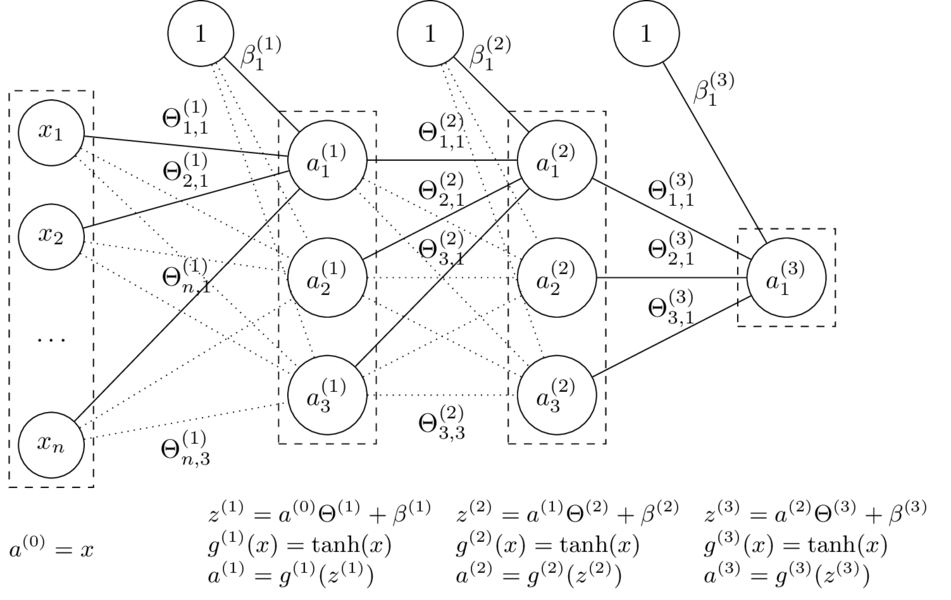

In [865]:
%%tikz -l arrows,automata,positioning,shapes,shapes.geometric,fit -f png -s 1000,600

\node[state] (x1) {$x_1$};
\node[state] (x2) [below=0.5cm of x1] {$x_2$};
\node[state, draw=none,fill=none] (dots) [below=0.5cm of x2] {$\cdots$};
\node[state] (xn) [below=0.5cm of dots] {$x_n$};

\node[state,circle] (a1) [below right=-0.33cm and 3cm of x1] {$a^{(1)}_1$};
\node[state,circle] (a2) [below=0.5cm of a1] {$a^{(1)}_2$};
\node[state,circle] (a3) [below=0.5cm of a2] {$a^{(1)}_3$};
\node[state] (b1) [above left=1cm and 1cm of a1] {$1$};

\node[state,circle] (a21) [right=2cm of a1] {$a^{(2)}_1$};
\node[state,circle] (a22) [below=0.5cm of a21] {$a^{(2)}_2$};
\node[state,circle] (a23) [below=0.5cm of a22] {$a^{(2)}_3$};
\node[state] (b2) [above left=1cm and 1cm of a21] {$1$};

\node[state,circle] (a31) [right=2cm of a22] {$a^{(3)}_1$};
\node[state] (b3) [right=2cm of b2] {$1$};

\path[-] 
(b1) edge node [above=.2cm, pos=0.5] {$\beta^{(1)}_{1}$} (a1)
(x1) edge node [above, pos=0.5] {$\Theta^{(1)}_{1,1}$} (a1)
(x2) edge node [above, pos=0.5] {$\Theta^{(1)}_{2,1}$} (a1)
(xn) edge node [above, pos=0.5] {$\Theta^{(1)}_{n,1}$} (a1);
                                     
\path[-, thin, dotted] 
(b1) edge node {} (a2)
(x1) edge node {} (a2)
(x2) edge node {} (a2)
(xn) edge node {} (a2)

(b1) edge node {} (a3)
(x1) edge node {} (a3)
(x2) edge node {} (a3)
(xn) edge node [below, pos=0.5] {$\Theta^{(1)}_{n,3}$} (a3);

\path[-] 
(b2) edge node [above=.2cm, pos=0.5] {$\beta^{(2)}_{1}$} (a21)
(a1) edge node [above, pos=0.5] {$\Theta^{(2)}_{1,1}$} (a21)
(a2) edge node [above, pos=0.5] {$\Theta^{(2)}_{2,1}$} (a21)
(a3) edge node [above, pos=0.5] {$\Theta^{(2)}_{3,1}$} (a21);

\path[-, thin, dotted] 
(b2) edge node {} (a22)
(a1) edge node {} (a22)
(a2) edge node {} (a22)
(a3) edge node {} (a22)

(b2) edge node {} (a23)
(a1) edge node {} (a23)
(a2) edge node {} (a23)
(a3) edge node [below, pos=0.5] {$\Theta^{(2)}_{3,3}$} (a23);

\path[-] 
(b3) edge node [above=.5cm, pos=0.5] {$\beta^{(3)}_{1}$} (a31)
(a21) edge node [above, pos=0.5] {$\Theta^{(3)}_{1,1}$} (a31)
(a22) edge node [above, pos=0.5] {$\Theta^{(3)}_{2,1}$} (a31)
(a23) edge node [above, pos=0.5] {$\Theta^{(3)}_{3,1}$} (a31);

\node [draw, dashed, fit=  (x1) (x2) (dots) (xn)] (w0) {};
\node [draw, dashed, fit= (a1) (a2) (a3)] (w1) {};
\node [draw, dashed, fit= (a21) (a22) (a23)] (w2) {};
\node [draw, dashed, fit= (a31)] (w3) {};

\node [draw, draw=none, fill=none, below=0.5cm of w0] (mw0) {\small$a^{(0)}=x$};
\node [draw, draw=none, fill=none, right=1.1cm of mw0] (mw1) 
{\small$\begin{array}{l}z^{(1)} = a^{(0)} \Theta^{(1)} + \beta^{(1)}\\g^{(1)}(x)=\tanh(x)\\a^{(1)}=g^{(1)}(z^{(1)})\end{array}$};
\node [draw, draw=none, fill=none, right=-.3cm of mw1] (mw2) 
{\small$\begin{array}{l}z^{(2)} = a^{(1)} \Theta^{(2)} + \beta^{(2)}\\g^{(2)}(x)=\tanh(x)\\a^{(2)}=g^{(2)}(z^{(2)})\end{array}$};
\node [draw, draw=none, fill=none, right=-.3cm of mw2] (mw3) 
{\small$\begin{array}{l}z^{(3)} = a^{(2)} \Theta^{(3)} + \beta^{(3)}\\g^{(3)}(x)=\tanh(x)\\a^{(3)}=g^{(3)}(z^{(3)})\end{array}$};


## Feedforward 1

* Mając daną $n$-warstwową sieć neuronową oraz jej parametry $\Theta^{(1)}, \ldots, \Theta^{(L)} $ oraz $\beta^{(1)}, \ldots, \beta^{(L)} $ liczymy: 
$$a^{(l)} = g^{(l)}\left( a^{(l-1)} \Theta^{(l)} + \beta^{(l)} \right). $$ 
* Parametry $\Theta$ to wagi na połączeniach miedzy neuronami dwóch warstw. Rozmiar macierzy $\Theta^{(l)}$, czyli macierzy wag na połączeniach warstw $a^{(l-1)}$ i $a^{(l)}$, to $\dim(a^{(l-1)}) \times \dim(a^{(l)})$. 
* Parametry $\beta$ zastępują tutaj dodawanie kolumny z jedynkami do naszej macierzy cech. Macierz $\beta^{(l)}$ ma rozmiar równy liczbie neuronów w odpowiedniej warstwie, czyli $1 \times \dim(a^{(l)})$.

## Feedforward 2

* Funkcje $g^{(l)}$ to tzw. **funkcje aktywacji**.
* Dla $i = 0$ przyjmujemy $a^{(0)} = \mathrm{x}$ (wektor wierszowy cech) oraz $g^{(0)}(x) = x$ (identyczność).
* W przypadku klasyfikacji, często dla ostatniej warstwy $L$ (o rozmiarze równym liczbie klas) przyjmuje się $g^{(L)}(x) = \mathop{\mathrm{softmax}}(x)$.
* Pozostałe funkcje aktywacji najcześciej mają postać sigmoidy (np. funkcja logistyczna lub tangens hiperboliczny, $\tanh$).
* W przypadku regresji często mamy pojedynczy neuron wyjściowy jak na obrazku. Funkcją aktywacji może wtedy być np. funkcja identycznościowa.


## Uczenie wielowarstwowych sieci 
Mając algorytm SGD oraz gradienty wszystkich wag, moglibyśmy trenować każdą sieć. 

* Niech:
$$\Theta = (\Theta^{(1)},\Theta^{(2)},\Theta^{(3)},\beta^{(1)},\beta^{(2)},\beta^{(3)})$$

* Funkcja sieci neuronowej z grafiki:

$$\small h_\Theta(x) = \tanh(\tanh(\tanh(x\Theta^{(1)}+\beta^{(1)})\Theta^{(2)} + \beta^{(2)})\Theta^{(3)} + \beta^{(3)})$$
* Funkcja kosztu dla regresji:
$$J(\Theta) = \dfrac{1}{2m} \sum_{i=1}^{m} (h_\Theta(x^{(i)})- y^{(i)})^2 $$
* Jak wyglądają gradienty?
$$\nabla_{\Theta^{(1)}} J(\Theta) = ? \quad \nabla_{\beta^{(3)}} J(\Theta) = ?$$

## Propagacja wsteczna (Backpropagation)
Dla jednego przykładu (x,y):

1. **Wejście**: Ustaw aktywacje w warstwie cech $a^{(0)}=x$ 
2. **Feedforward:** dla $l=1,\dots,L$ oblicz 
$$z^{(l)} = a^{(l-1)} \Theta^{(l)} + \beta^{(l)} \textrm{ oraz } a^{(l)}=g^{(l)}(z^{(l)})$$
3. **Błąd wyjścia $\delta^{(L)}$:** oblicz wektor $$\delta^{(L)}= \nabla_{a^{(L)}}J(\Theta) \odot {g^{\prime}}^{(L)}(z^{(L)})$$
4. **Propagacja wsteczna błędu:** dla $l = L-1,L-2,\dots,1$ oblicz $$\delta^{(l)} = \delta^{(l+1)}(\Theta^{(l+1)})^T \odot {g^{\prime}}^{(l)}(z^{(l)})$$
5. **Gradienty:** 
    * $\dfrac{\partial}{\partial \Theta_{ij}^{(l)}} J(\Theta) = a_i^{(l-1)}\delta_j^{(l)} \textrm{ oraz } \dfrac{\partial}{\partial \beta_{j}^{(l)}} J(\Theta) = \delta_j^{(l)}$

$$\small J(\Theta) = \frac{1}{2}(a^{(L)} - y)^2 $$
$$\small  \dfrac{\partial}{\partial a^{(L)}} J(\Theta) = a^{(L)} - y$$

$$\small \tanh^{\prime}(x) = 1 - \tanh^2(x)$$

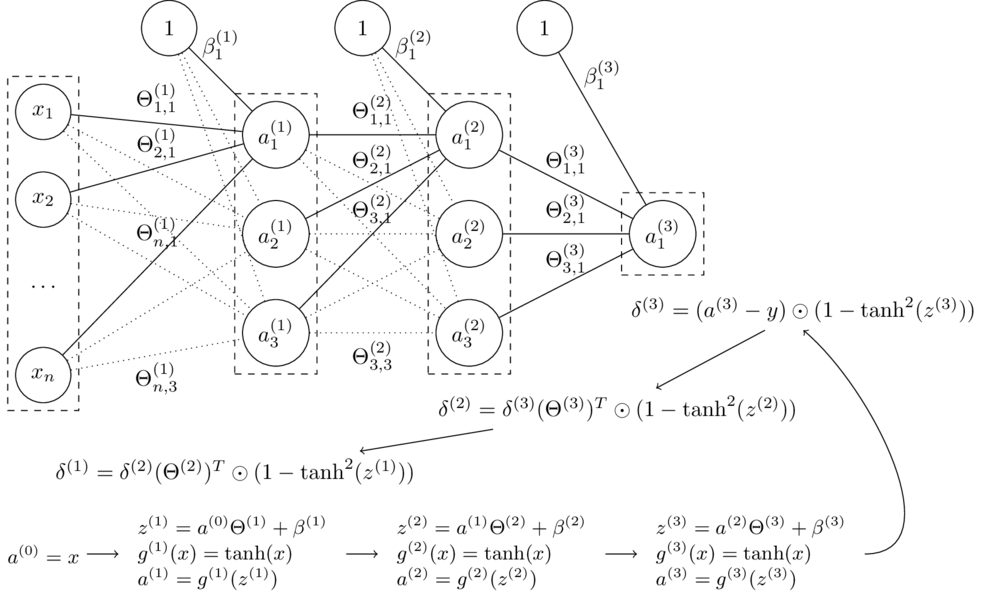

In [866]:
%%tikz -l arrows,automata,positioning,shapes,shapes.geometric,fit -f png -s 1000,600

\node[state] (x1) {$x_1$};
\node[state] (x2) [below=0.5cm of x1] {$x_2$};
\node[state, draw=none,fill=none] (dots) [below=0.5cm of x2] {$\cdots$};
\node[state] (xn) [below=0.5cm of dots] {$x_n$};

\node[state,circle] (a1) [below right=-0.33cm and 3cm of x1] {$a^{(1)}_1$};
\node[state,circle] (a2) [below=0.5cm of a1] {$a^{(1)}_2$};
\node[state,circle] (a3) [below=0.5cm of a2] {$a^{(1)}_3$};
\node[state] (b1) [above left=1cm and 1cm of a1] {$1$};

\node[state,circle] (a21) [right=2cm of a1] {$a^{(2)}_1$};
\node[state,circle] (a22) [below=0.5cm of a21] {$a^{(2)}_2$};
\node[state,circle] (a23) [below=0.5cm of a22] {$a^{(2)}_3$};
\node[state] (b2) [above left=1cm and 1cm of a21] {$1$};

\node[state,circle] (a31) [right=2cm of a22] {$a^{(3)}_1$};
\node[state] (b3) [right=2cm of b2] {$1$};

\node[draw=none, fill=none] (delta3) [below right=0.5cm and -1cm of a31] 
{$\delta^{(3)}=(a^{(3)}-y) \odot (1-\tanh^2(z^{(3)}))$};

\node[draw=none, fill=none] (delta2) [below right=0.5cm and -1cm of a23] 
{$\delta^{(2)}= \delta^{(3)}(\Theta^{(3)})^T \odot (1-\tanh^2(z^{(2)}))$};

\node[draw=none, fill=none] (delta1) [below right=1.5cm and -4cm of a3] 
{$\delta^{(1)}= \delta^{(2)}(\Theta^{(2)})^T \odot (1-\tanh^2(z^{(1)}))$};


\path[-] 
(b1) edge node [above=.2cm, pos=0.5] {$\beta^{(1)}_{1}$} (a1)
(x1) edge node [above, pos=0.5] {$\Theta^{(1)}_{1,1}$} (a1)
(x2) edge node [above, pos=0.5] {$\Theta^{(1)}_{2,1}$} (a1)
(xn) edge node [above, pos=0.5] {$\Theta^{(1)}_{n,1}$} (a1);
                                     
\path[-, thin, dotted] 
(b1) edge node {} (a2)
(x1) edge node {} (a2)
(x2) edge node {} (a2)
(xn) edge node {} (a2)

(b1) edge node {} (a3)
(x1) edge node {} (a3)
(x2) edge node {} (a3)
(xn) edge node [below, pos=0.5] {$\Theta^{(1)}_{n,3}$} (a3);

\path[-] 
(b2) edge node [above=.2cm, pos=0.5] {$\beta^{(2)}_{1}$} (a21)
(a1) edge node [above, pos=0.5] {$\Theta^{(2)}_{1,1}$} (a21)
(a2) edge node [above, pos=0.5] {$\Theta^{(2)}_{2,1}$} (a21)
(a3) edge node [above, pos=0.5] {$\Theta^{(2)}_{3,1}$} (a21);

\path[-, thin, dotted] 
(b2) edge node {} (a22)
(a1) edge node {} (a22)
(a2) edge node {} (a22)
(a3) edge node {} (a22)

(b2) edge node {} (a23)
(a1) edge node {} (a23)
(a2) edge node {} (a23)
(a3) edge node [below, pos=0.5] {$\Theta^{(2)}_{3,3}$} (a23);

\path[-] 
(b3) edge node [above=.5cm, pos=0.5] {$\beta^{(3)}_{1}$} (a31)
(a21) edge node [above, pos=0.5] {$\Theta^{(3)}_{1,1}$} (a31)
(a22) edge node [above, pos=0.5] {$\Theta^{(3)}_{2,1}$} (a31)
(a23) edge node [above, pos=0.5] {$\Theta^{(3)}_{3,1}$} (a31);

\node [draw, dashed, fit=  (x1) (x2) (dots) (xn)] (w0) {};
\node [draw, dashed, fit= (a1) (a2) (a3)] (w1) {};
\node [draw, dashed, fit= (a21) (a22) (a23)] (w2) {};
\node [draw, dashed, fit= (a31)] (w3) {};

\node [draw, draw=none, fill=none, below=2cm of w0] (mw0) {\small$a^{(0)}=x$};
\node [draw, draw=none, fill=none, right=.5cm of mw0] (mw1) 
{\small$\begin{array}{l}z^{(1)} = a^{(0)} \Theta^{(1)} + \beta^{(1)}\\g^{(1)}(x)=\tanh(x)\\a^{(1)}=g^{(1)}(z^{(1)})\end{array}$};
\node [draw, draw=none, fill=none, right=.5cm of mw1] (mw2) 
{\small$\begin{array}{l}z^{(2)} = a^{(1)} \Theta^{(2)} + \beta^{(2)}\\g^{(2)}(x)=\tanh(x)\\a^{(2)}=g^{(2)}(z^{(2)})\end{array}$};
\node [draw, draw=none, fill=none, right=.5cm of mw2] (mw3) 
{\small$\begin{array}{l}z^{(3)} = a^{(2)} \Theta^{(3)} + \beta^{(3)}\\g^{(3)}(x)=\tanh(x)\\a^{(3)}=g^{(3)}(z^{(3)})\end{array}$};

\path[->] 
(mw0) edge node {} (mw1)
(mw1) edge node {} (mw2)
(mw2) edge node {} (mw3)
(mw3.east) edge[in=320,out=0] node {} (delta3.south)
;

\path[->] 
(delta3) edge node {} (delta2)
(delta2) edge node {} (delta1)
;

## SGD z propagacją wsteczną

Jedna iteracja:
* Dla parametrów $\Theta = (\Theta^{(1)},\ldots,\Theta^{(L)})$ utwórz pomocnicze macierze zerowe $\Delta = (\Delta^{(1)},\ldots,\Delta^{(L)})$ o takich samych wymiarach (dla uproszczenia opuszczono wagi $\beta$).
* Dla $m$ przykładów w wsadzie (batch), $i = 1,\ldots,m$:
    * Wykonaj algortym propagacji wstecz dla przykładu $(x^{(i)}, y^{(i)})$ i przechowaj gradienty $\nabla_{\Theta}J^{(i)}(\Theta)$ dla tego przykładu;
    * $\Delta := \Delta + \dfrac{1}{m}\nabla_{\Theta}J^{(i)}(\Theta)$
* Wykonaj aktualizację wag: $\Theta := \Theta - \alpha \Delta$